# Genetic Algorithm - randomly generated portfolios

### seed collection

Seed values ensure that random number generation is reproducible and, to some extent, controlled. By setting a seed, the sequence of "random" numbers remains the same each time you run the code, which is useful for debugging, testing, and experimentation. While randomness still exists, setting the seed allows you to replay or share specific scenarios. To make it memorable, use your favorite numbers as seeds.

For fun, I collected some cool numbers for your entertainment — enjoy exploring the randomness!


- 1337 — Leet (elite) speak, popular in hacker culture.
- 007 — James Bond
- 008 - and his colleague
- 37 - the most frequently selected "random" number by humans
- 1701 — The registry number of the USS Enterprise from Star Trek.
- 1138 - George Lucas' directorial debut, appears in StarWars
- 101 -  Matrix, Neos appartman number.
- 6EQUJ5 - wow! signal - use it as hash(6EQUJ5)
- 88 - the speed required to go Back to the Future.
- 2187 - The number of Princess Leia's detention cell on Death Star.
- 1984 — A nod to George Orwell’s famous dystopian novel.
- 808 — Famous Roland TR-808 drum machine, iconic in electronic music.
- 42 — The original Hitchhiker’s Guide to the Galaxy number.
- 314 — A reference to Pi (3.14), cool for math enthusiasts.
- 1618 — The first few digits of the golden ratio (1.618033...).
- 12345 — the secret password from Spaceballs.
- 1967 - my year of birth
- 536 - the year of Late Antique Little Ice Age in Europe
- 1986 - Chernobyl Disaster
- 12 - twelve monkey, dirty dozen, blues
- 66 - order ended the Jedis in Star Wars
- 426 - LV-426 Acheron the moon Xenomorph is first encountered by humans
- 51 - Area 51 the popular landing site of UFOs
- 52 - Area 52 the ugly neighborhood (Dugway Proving Ground military testing facility).
- 0077 — Agent "Double-O Seven" but with extra flair.
- 404 — Annoying "not found" error code, you don't find it, debugging vibes.
- 1331 — A palindrome number, satisfying for symmetry lovers.
- 777 — Jackpot! For a bit of luck from the slot machines.
- 24601 — Jean Valjean's prisoner number in Les Misérables.
- 9000 — "I'm sorry, Dave. I'm afraid I can't do that." — HAL 9000 from 2001: A Space Odyssey.
- 8675309 — Jenny's number from the famous 1980s song "867-5309/Jenny."
- 1492 — The year Columbus sailed the ocean blue, a nod to historical events.
- 221 — Sherlock Holmes' iconic address at 221B Baker Street.
- 451 — Fahrenheit 451 by Ray Bradbury, representing censorship and dystopia.
- 1776 — The year of the U.S. Declaration of Independence.
- 1985 — The year Marty McFly travels back to in Back to the Future.
- 2015 - The future of Marty McFly back in the Future.
- 300 — The brave Spartans of 300, a movie reference.
- 1999 — Party like it’s 1999! A nod to Prince’s iconic song.


### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt
import random
import math
from itertools import combinations
from scipy.stats import linregress

### import data

In [2]:
plt.style.use('ggplot')

In [3]:
seed = 51 #Spaceball secret code
np.random.seed (seed)

In [4]:
url = 'https://datahub.io/core/s-and-p-500-companies/r/constituents.csv'
sp500_tickers = pd.read_csv(url)

# Get the list of tickers, randomly by using sample
num_of_symbols = 100
tickers = sp500_tickers['Symbol'].sample(num_of_symbols, random_state=seed).tolist() # randome_state is the seed for the random choice

In [5]:
#Yahoo! connector to download the prices
stocks = tickers
start_date = '2020-01-01'
end_date = dt.datetime.today().strftime('%Y-%m-%d') # until today
data = yf.download(stocks, start=start_date, end=end_date)

[*********************100%***********************]  100 of 100 completed


In [6]:
data.head()

Price                      Adj Close                                   \
Ticker                             A       AAPL       ACGL        AES   
Date                                                                    
2020-01-02 00:00:00+00:00  83.214867  72.876099  43.400002  17.277994   
2020-01-03 00:00:00+00:00  81.878784  72.167587  43.349998  17.079590   
2020-01-06 00:00:00+00:00  82.120827  72.742645  43.520000  17.277994   
2020-01-07 00:00:00+00:00  82.372559  72.400543  43.160000  17.338377   
2020-01-08 00:00:00+00:00  83.185814  73.565186  42.730000  17.303867   

Price                                                                     \
Ticker                         AMCR         AMT         APD          AZO   
Date                                                                       
2020-01-02 00:00:00+00:00  8.615147  202.214462  206.406891  1189.739990   
2020-01-03 00:00:00+00:00  8.501682  202.311844  201.816895  1187.979980   
2020-01-06 00:00:00+00:00  8.444951  202.258759  201.727600  1165.709961   
2020-01-07 00:00:00+00:00  8.372008  197.948975  202.584869  1145.380005   
2020-01-08 00:00:00+00:00  8.404428  199.665771  203.683243  1147.489990   

Price                                             ...    Volume           \
Ticker                             BA       BALL  ...      UBER      UPS   
Date                                              ...                      
2020-01-02 00:00:00+00:00  331.348572  60.674458  ...  20578900  4158100   
2020-01-03 00:00:00+00:00  330.791901  61.519794  ...  18822700  2477800   
2020-01-06 00:00:00+00:00  331.766083  60.949898  ...  21204700  3381600   
2020-01-07 00:00:00+00:00  335.285156  60.712448  ...  30119600  1952300   
2020-01-08 00:00:00+00:00  329.410095  61.234852  ...  43944400  2016000   

Price                                                                    \
Ticker                        VMC      VST       WBA     WELL       WMB   
Date                                                                      
2020-01-02 00:00:00+00:00  843400  3934900   5700500  2049100   6970000   
2020-01-03 00:00:00+00:00  906800  3768200   4892300  1687000   7542700   
2020-01-06 00:00:00+00:00  798000  4901400   6003300  2201200  12104200   
2020-01-07 00:00:00+00:00  976500  4697800   4365700  1239500   8952900   
2020-01-08 00:00:00+00:00  674100  5776900  17431800  2016800   7396400   

Price                                                
Ticker                        WST     WYNN      XEL  
Date                                                 
2020-01-02 00:00:00+00:00  527800  3006500  2915400  
2020-01-03 00:00:00+00:00  316100  1760500  2422500  
2020-01-06 00:00:00+00:00  331900  1357900  2217100  
2020-01-07 00:00:00+00:00  289800  1722100  1861100  
2020-01-08 00:00:00+00:00  533900  1176200  4828900  

[5 rows x 600 columns]

In [7]:
data = data.reindex(columns=pd.MultiIndex.from_product([data.columns.levels[0], tickers])) # reorder the columns
data.head()

Price                       Adj Close                                        \
                                   CI         PEP        PSX      CMCSA CEG   
Date                                                                          
2020-01-02 00:00:00+00:00  192.106400  118.635826  91.679039  40.050060 NaN   
2020-01-03 00:00:00+00:00  190.456604  118.469864  88.647583  39.732281 NaN   
2020-01-06 00:00:00+00:00  193.962448  118.924080  88.091957  39.432144 NaN   
2020-01-07 00:00:00+00:00  194.909180  117.054825  88.361610  39.849003 NaN   
2020-01-08 00:00:00+00:00  198.171219  117.657539  85.060486  40.256973 NaN   

Price                                                                    \
                                 WYNN         PNC       STLD         SO   
Date                                                                      
2020-01-02 00:00:00+00:00  140.138107  133.292099  30.622570  51.756001   
2020-01-03 00:00:00+00:00  138.059479  132.012100  30.078981  51.706417   
2020-01-06 00:00:00+00:00  137.786224  131.746124  29.988386  51.913036   
2020-01-07 00:00:00+00:00  138.440048  130.707199  30.649759  51.756001   
2020-01-08 00:00:00+00:00  139.308578  132.061981  30.676939  51.739471   

Price                                  ...    Volume                    \
                                 MKTX  ...       KMI      BAX     ROST   
Date                                   ...                               
2020-01-02 00:00:00+00:00  364.906525  ...  10373100  2957800  1722500   
2020-01-03 00:00:00+00:00  364.714691  ...  10148700  1871700  1486500   
2020-01-06 00:00:00+00:00  358.985565  ...  13978300  3500000  1573600   
2020-01-07 00:00:00+00:00  360.108276  ...  14736900  4803200  1961900   
2020-01-08 00:00:00+00:00  349.600220  ...  10651500  3576600  1565200   

Price                                                                          \
                             ORLY     MTB     GRMN      APD     WELL        A   
Date                                                                            
2020-01-02 00:00:00+00:00  796100  509100   828000  1320500  2049100  1410500   
2020-01-03 00:00:00+00:00  482900  461900   503800  1710400  1687000  1118300   
2020-01-06 00:00:00+00:00  837100  372900   686200  1737400  2201200  1993200   
2020-01-07 00:00:00+00:00  661500  324800   781200  1518900  1239500  1684700   
2020-01-08 00:00:00+00:00  479500  462500  1080000   965700  2016800  1847600   

Price                              
                              DPZ  
Date                               
2020-01-02 00:00:00+00:00  500000  
2020-01-03 00:00:00+00:00  490800  
2020-01-06 00:00:00+00:00  525400  
2020-01-07 00:00:00+00:00  501000  
2020-01-08 00:00:00+00:00  543000  

[5 rows x 600 columns]

In [8]:
stock_close = data['Adj Close']
stock_close.head()

,CI,PEP,PSX,CMCSA,CEG,WYNN,PNC,STLD,SO,MKTX,...,KMI,BAX,ROST,ORLY,MTB,GRMN,APD,WELL,A,DPZ
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02 00:00:00+00:00,192.106400,118.635826,91.679039,40.050060,NaN,140.138107,133.292099,30.622570,51.756001,364.906525,...,15.312114,78.079247,111.634995,437.519989,145.778442,87.693756,206.406891,68.426216,83.214867,278.352173
2020-01-03 00:00:00+00:00,190.456604,118.469864,88.647583,39.732281,NaN,138.059479,132.012100,30.078981,51.706417,364.714691,...,15.428554,77.742821,111.663658,438.750000,144.287155,87.131958,201.816895,69.630142,81.878784,279.556976
2020-01-06 00:00:00+00:00,193.962448,118.924080,88.091957,39.432144,NaN,137.786224,131.746124,29.988386,51.913036,358.985565,...,15.486770,77.551865,112.208290,434.660004,143.094116,87.114113,201.727600,70.688904,82.120827,278.873962
2020-01-07 00:00:00+00:00,194.909180,117.054825,88.361610,39.849003,NaN,138.440048,130.707199,30.649759,51.756001,360.108276,...,15.523162,77.733719,113.517387,428.769989,141.364243,86.980354,202.584869,70.227814,82.372559,276.881653
2020-01-08 00:00:00+00:00,198.171219,117.657539,85.060486,40.256973,NaN,139.308578,132.061981,30.676939,51.739471,349.600220,...,15.399442,78.861214,113.851830,431.899994,142.080063,86.498802,203.683243,70.244888,83.185814,275.657715


### functions

#### portfolio analysis functions

In [9]:
def stock_KPIs(dataframe, start_date, end_date):
  '''
    Explanation
    Daily Returns Calculation: The calculate_individual_returns function calculates returns per stock, leaving NaN where data is missing, so no artificial data is introduced.
    Mean Returns Calculation: Using mean(skipna=True) calculates the mean for each stock based only on existing data, ignoring NaN values.
    Covariance Matrix Calculation: The covariance matrix is calculated using pairwise deletion (min_periods=1), so each covariance value is based only on dates where both stocks have available data.
    '''
  filtered_df = dataframe.loc[start_date:end_date] # option to slice the data frame by date
  filtered_df = filtered_df.where(filtered_df > 0) # Replace zero or negative values with NaN (to handle cases where data might be invalid)
  filtered_df = filtered_df.ffill()  # Forward-fill only for zero or negative values that are transformed to NaN, Note: This still keeps original missing values as NaN
  def calculate_individual_returns(df):
        # Calculate daily log returns without filling NaNs (preserves missing data)
        return df.apply(lambda x: np.log(x / x.shift(1)))

  p_daily_returns = calculate_individual_returns(filtered_df) # still keeps the non-trading periods

  mean_returns = p_daily_returns.mean(skipna=True) * 252  # Annualized mean returns ignoring NaNs
  variance = p_daily_returns.var(skipna=True) * 252 # Annualized variance ignoring NaNs
  volatility = p_daily_returns.std(skipna=True) * np.sqrt(252)  # Annualized standard deviation
  cov_matrix_pairwise = p_daily_returns.cov(min_periods=1) * 252  # Annualized pairwise covariance matrix

  return {
      'data frame' : filtered_df,
      'variance': variance,
      'volatility': volatility,
      'mean_returns': mean_returns, # series for mean returns
      'cov_matrix': cov_matrix_pairwise
  }

In [10]:
def chart(x_min=0,
                x_max=1,
                y_min=-0.5,
                y_max=1,
                title='Simulated Portfolio Optimization',
                xlabel='Risk (Sigma)',
                ylabel='Return'):
    """
    Sets up the chart with specified axis limits, labels, and title.
    Returns the figure and axes objects for further plotting.
    """
    fig, ax = plt.subplots(figsize=(15, 6))

    # Set x and y axis limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Adding labels and title
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Hide top and right spines
    ax.spines[['top', 'right']].set_visible(False)

    # Turn off grid
    ax.grid(False)

    return fig, ax

In [11]:
def portfolio_return(weights, returns):
  weights_array = np.array(weights)
  returns = np.dot(weights_array,returns)
  return returns

In [12]:
def portfolio_volatility(weights, cov_matrix):
  weights_array = np.array(weights)
  variance = np.dot(weights_array.T, np.dot(cov_matrix, weights_array))
  return np.sqrt(variance)

#### genetic algorithm functions

In [13]:
def initial_generation(metrics, num_stocks_per_portfolio, num_portfolios):
    portfolio_data = []

    # Check if we can create portfolios with the given number of stocks
    if num_stocks_per_portfolio > len(metrics):
        return 'Error: num_stocks_per_portfolio is too large'

    for _ in range(num_portfolios):
        # Step 1: Randomly select `num_stocks_per_portfolio` stocks from the `metrics` index
        selected_stocks = random.sample(metrics.index.tolist(), num_stocks_per_portfolio)

        # Step 2: Generate random weights that sum to 1 for the selected stocks
        weights = np.random.dirichlet(np.ones(num_stocks_per_portfolio), size=1)[0]

        # Step 3: Store the selected stocks and weights in a dictionary
        portfolio_data.append({
            'elements': selected_stocks,
            'weights': weights
        })

    # Convert the list of portfolios to a DataFrame
    portfolios = pd.DataFrame(portfolio_data)
    return portfolios


In [14]:

def plot_generation_portfolios(generation_df, metrics, generation_name="generation", x_min=0, x_max=1, y_min=-0.5, y_max=1):
    # Normalize the Sharpe ratio between 0 and 1
    sharpe_min = generation_df['portfolio_sharpe'].min()
    sharpe_max = generation_df['portfolio_sharpe'].max()
    normalized_sharpe = (generation_df['portfolio_sharpe'] - sharpe_min) / (sharpe_max - sharpe_min)

    # Calculate the average Sharpe ratio
    average_sharpe = generation_df['portfolio_sharpe'].mean()
    maximum_sharpe = generation_df['portfolio_sharpe'].max()

    # Create a color map based on the normalized Sharpe ratio
    cmap = plt.colormaps['cividis']  # Choose any colormap
    colors = cmap(normalized_sharpe)

    # Initialize the figure and axes
    fig, ax = plt.subplots(figsize=(15, 6))

      # Set x and y axis limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Set the title with the generation name
    ax.set_title(f"{generation_name} simulated portfolios risk and return analysis")

    # Plot each generation's portfolios, coloring them by Sharpe ratio
    scatter = ax.scatter(
        generation_df['portfolio_volatility'],
        generation_df['portfolio_return'],
        c=normalized_sharpe,  # Use normalized Sharpe ratio for color
        cmap='cividis',
        label='Portfolios',
        alpha=0.7,
        edgecolors='w',
        s=60  # Size of points
    )

    # Now plot individual stocks so they appear on top
    ax.scatter(metrics['volatility'], metrics['mean_returns'], color='red', label='Individual Stocks', zorder=5)

    # Annotate the tickers
    for i, ticker in enumerate(metrics.index):
        ax.annotate(
            ticker,
            (metrics['volatility'].iloc[i], metrics['mean_returns'].iloc[i]),
            textcoords="offset points",
            xytext=(0, 10),
            ha='center',
            zorder=10  # Ensure annotations are on top
        )

    # Add a color bar to explain the mapping of color to Sharpe ratio
    cbar = fig.colorbar(scatter)
    cbar.set_label('Sharpe Ratio')

    # Add a text box with the average Sharpe ratio
    textstr = f"average Sharpe ratio is {average_sharpe:.2f}\nmaximum Sharpe ratio is {maximum_sharpe:.2f}"
    props = dict(boxstyle='round', facecolor='wheat', alpha=1)
    ax.text(0.6, 0.8, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='bottom', bbox=props)

    # Update the legend to show the individual stocks and generation portfolios
    ax.legend()
    plt.tight_layout()

# Example usage:
# plot_generation_portfolios(generation_02, metrics, generation_name="generation_02")



In [15]:
def add_metrics(generation_df, metrics, cov_matrix):
    '''Allows duplicates in the portfolios and attaches relevant metrics.'''

    portfolios_with_metrics = []

    for _, row in generation_df.iterrows():
        elements = row['elements']  # Keep tickers as is (including duplicates)
        weights = np.array(row['weights'])  # Convert weights to NumPy array for matrix operations

        # Retrieve metrics for the selected tickers (including duplicates)
        mean_returns = []
        volatility = []
        for element in elements:
            mean_returns.append(metrics.loc[element, 'mean_returns'])
            volatility.append(metrics.loc[element, 'volatility'])

        # Build the covariance matrix for the selected tickers (including duplicates)
        portfolio_cov_matrix = cov_matrix.loc[elements, elements]

        # Store portfolio with attached metrics
        portfolios_with_metrics.append({
            'elements': elements,
            'weights': weights,
            'mean_returns': np.array(mean_returns),
            'volatility': np.array(volatility),
            'cov_matrix': portfolio_cov_matrix
        })

    # Convert to DataFrame for further use
    portfolios_with_metrics_df = pd.DataFrame(portfolios_with_metrics)
    return portfolios_with_metrics_df



In [16]:
def add_portfolio_metrics(portfolios_with_metrics_df, risk_free_rate=0.05, generation_id=0):
    portfolio_metrics = []

    for i, row in portfolios_with_metrics_df.iterrows():
        row_data = row.to_dict()

        # Extract components
        elements = row_data.get('elements', [])
        weights = row_data.get('weights', [])
        mean_returns_selected = row_data.get('mean_returns', [])
        cov_matrix_selected = row_data.get('cov_matrix', None)

        # Revised check for missing data
        if len(elements) == 0 or len(weights) == 0 or len(mean_returns_selected) == 0 or cov_matrix_selected is None:
            print(f"Warning: Missing data in row {i}, skipping...")
            continue

        # Calculate portfolio metrics if data is complete
        portfolio_return = np.dot(weights, mean_returns_selected)
        portfolio_variance = np.dot(weights.T, np.dot(cov_matrix_selected, weights))
        portfolio_volatility = np.sqrt(portfolio_variance)
        portfolio_sharpe = (portfolio_return - risk_free_rate) / portfolio_volatility

        # Store the calculated metrics
        portfolio_metrics.append({
            'generation_id': generation_id,
            'portfolio_return': portfolio_return,
            'portfolio_variance': portfolio_variance,
            'portfolio_volatility': portfolio_volatility,
            'portfolio_sharpe': portfolio_sharpe
        })

    # Convert the results into a DataFrame
    portfolio_metrics_df = pd.DataFrame(portfolio_metrics)

    # Merge the original portfolio data with the calculated metrics
    portfolio_df_with_metrics = pd.concat([portfolios_with_metrics_df, portfolio_metrics_df], axis=1)

    return portfolio_df_with_metrics

In [44]:
def select_fairies_and_generate_wanderers(portfolio_df, metrics, cov_matrix, num_stocks_per_portfolio, num_fairies=7, num_wanderers=3):
    # Step 1: Select the top 'num_fairies' portfolios based on Sharpe ratio
    sorted_portfolios = portfolio_df.sort_values(by='portfolio_sharpe', ascending=False)
    fairies = sorted_portfolios.head(num_fairies)[['elements', 'weights']]

    # Step 2: Flatten the 'elements' in fairies and get unique values
    fairy_elements = list(set(fairies['elements'].explode().tolist()))

    # Step 3: Exclude the fairy elements from the metrics DataFrame
    remaining_metrics = metrics.drop(index=fairy_elements, errors='ignore')

    # Step 4: Check if we have enough stocks to choose from. If not, we use the entire list from metrics.
    if len(remaining_metrics) < num_stocks_per_portfolio:
        # print("Not enough remaining stocks; resetting to full metrics for wanderer selection.")
        remaining_metrics = metrics.copy()  # Use the entire metrics DataFrame if there aren’t enough stocks left

    # Step 5: Generate wanderers from the updated remaining metrics
    wanderers = initial_generation(remaining_metrics, num_stocks_per_portfolio, num_wanderers)

    # Combine the fairies and wanderers into one DataFrame
    fairy_tale_family = pd.concat([fairies, wanderers], ignore_index=True)

    return fairy_tale_family

In [18]:
def create_daddy_mummy_pairs(fairy_tale_family):
    # Get the list of portfolio elements and weights
    portfolio_elements = fairy_tale_family['elements'].tolist()
    portfolio_weights = fairy_tale_family['weights'].tolist()

    # Create all unique pairs using itertools.combinations
    pairs = list(combinations(range(len(portfolio_elements)), 2))  # Indices for pairing

    # Create a list to store pairs with weights as tuples
    pairs_data = []

    for pair in pairs:
        daddy_idx, mummy_idx = pair
        # Get the elements and weights for daddies and mummies
        daddy_tickers = portfolio_elements[daddy_idx]
        mummy_tickers = portfolio_elements[mummy_idx]
        daddy_weights = portfolio_weights[daddy_idx]
        mummy_weights = portfolio_weights[mummy_idx]

        # Combine tickers and weights into tuples for daddy and mummy
        daddy = list(zip(daddy_tickers, daddy_weights))  # List of (ticker, weight) tuples for daddy
        mummy = list(zip(mummy_tickers, mummy_weights))  # List of (ticker, weight) tuples for mummy

        # Store the pair in the list
        pairs_data.append({
            'daddy': daddy,
            'mummy': mummy
        })

    # Convert the pairs data into a DataFrame
    pairs_df = pd.DataFrame(pairs_data)

    return pairs_df

In [19]:
# Function to normalize the weights
def normalize_weights(ticker_weight_list):
    total_weight = sum([weight for _, weight in ticker_weight_list])
    return [(ticker, weight / total_weight) for ticker, weight in ticker_weight_list]


In [20]:
def split_integer(number, ratio=0.2):
    """
    Splits an integer into two parts based on a given ratio.

    Parameters:
    - number (int): The integer to split.
    - ratio (float): The ratio for the first part (between 0 and 1).

    Returns:
    - tuple: Two integers that add up to the original number.
    """
    part1 = math.ceil(number * ratio)
    part2 = number - part1
    return part1, part2

In [21]:
# Function to create children by selecting different proportions of tickers from daddies and mummies
def create_children_from_parents(pairs_df, metrics, num_stocks_per_portfolio):
    children_data = []

    for i, row in pairs_df.iterrows():
        daddy = row['daddy']
        mummy = row['mummy']

        a_split = split_integer(num_stocks_per_portfolio, ratio = 0.2)
        b_split = split_integer(num_stocks_per_portfolio, ratio = 0.5)

        # Case 1: 2 from daddy, 8 from mummy
        daddy_selected_2 = random.sample(daddy, a_split[0])  # Select 2 tickers from daddy
        mummy_selected_8 = random.sample(mummy, a_split[1])  # Select 8 tickers from mummy
        combined_2_8 = daddy_selected_2 + mummy_selected_8  # No need to handle duplicates
        normalized_2_8 = normalize_weights(combined_2_8)
        elements_2_8 = [ticker for ticker, _ in normalized_2_8]  # Extract tickers
        weights_2_8 = [weight for _, weight in normalized_2_8]  # Extract weights

        # Case 2: 5 from daddy, 5 from mummy
        daddy_selected_5 = random.sample(daddy, b_split[0])  # Select 5 tickers from daddy
        mummy_selected_5 = random.sample(mummy, b_split[1])  # Select 5 tickers from mummy
        combined_5_5 = daddy_selected_5 + mummy_selected_5
        normalized_5_5 = normalize_weights(combined_5_5)
        elements_5_5 = [ticker for ticker, _ in normalized_5_5]
        weights_5_5 = [weight for _, weight in normalized_5_5]

        # Case 3: 8 from daddy, 2 from mummy
        daddy_selected_8 = random.sample(daddy, a_split[1])  # Select 8 tickers from daddy
        mummy_selected_2 = random.sample(mummy, a_split[0])  # Select 2 tickers from mummy
        combined_8_2 = daddy_selected_8 + mummy_selected_2
        normalized_8_2 = normalize_weights(combined_8_2)
        elements_8_2 = [ticker for ticker, _ in normalized_8_2]
        weights_8_2 = [weight for _, weight in normalized_8_2]

        # Case 4: Mutated child (replace one ticker with a new one from metrics)
        combined_tickers = daddy_selected_5 + mummy_selected_5  # 5-5 combination
        available_tickers = list(set(metrics.index.tolist()) - set([ticker for ticker, _ in combined_tickers]))
        new_ticker = random.choice(available_tickers)
        # Replace one ticker (randomly chosen from the combined set)
        combined_tickers[random.randint(0, num_stocks_per_portfolio-1)] = (new_ticker, random.uniform(0.01, 0.1))  # Replace one with new ticker
        normalized_mutated = normalize_weights(combined_tickers)
        elements_mutated = [ticker for ticker, _ in normalized_mutated]
        weights_mutated = [weight for _, weight in normalized_mutated]

        # Store each child in the list with elements and weights
        children_data.append({
            'elements': elements_2_8,
            'weights': weights_2_8
        })
        children_data.append({
            'elements': elements_5_5,
            'weights': weights_5_5
        })
        children_data.append({
            'elements': elements_8_2,
            'weights': weights_8_2
        })
        children_data.append({
            'elements': elements_mutated,
            'weights': weights_mutated
        })

    # Convert children data to a DataFrame with elements and weights
    children_df = pd.DataFrame(children_data)

    return children_df



In [46]:
def run_generations(metrics, cov_matrix, num_generations, num_stocks_per_portfolio, fairy_num, wanderer_num, risk_free_rate=0.05):

  num = fairy_num + wanderer_num # fairy and wanderer determines the number of daddy-mummy potentials (they are the best fairies + wanderers)
  num_pairs = (num * (num-1)) / 2 # we determine the number of pairs
  num_portfolios = int(num_pairs * 4) # since each pair will have 4 children, we determine the number of portfolios

  # create the initial generation:
  generation_next = initial_generation(metrics, num_stocks_per_portfolio, num_portfolios)
  fairy_generations = pd.DataFrame()

  # we should start the loop here
  for generation_id in range(num_generations):
    generation_metrics = add_metrics(generation_next, metrics, cov_matrix)
    generation_eval = add_portfolio_metrics(generation_metrics, risk_free_rate, generation_id=generation_id)
    fairy_family = select_fairies_and_generate_wanderers(generation_eval, metrics, cov_matrix, num_stocks_per_portfolio, num_fairies=fairy_num, num_wanderers=wanderer_num)
    daddy_mummy_pairs = create_daddy_mummy_pairs(fairy_family)
    generation_next = create_children_from_parents(daddy_mummy_pairs, metrics, num_stocks_per_portfolio)
    fairy_generations = pd.concat([fairy_generations, generation_eval], ignore_index=True)

  return fairy_generations


### stock analysis

In [23]:
# to check - analysis shall use annualized figures
mean_returns = stock_KPIs(stock_close, start_date, end_date)['mean_returns'].rename('returns')
cov_matrix = stock_KPIs(stock_close, start_date, end_date)['cov_matrix']

In [24]:
metrics = pd.DataFrame({
    'mean_returns': mean_returns,
    'variance': np.diag(cov_matrix),
    'volatility': np.sqrt(np.diag(cov_matrix))
}, index=tickers)
metrics

,mean_returns,variance,volatility
CI,0.102358,0.113892,0.337479
PEP,0.069717,0.049455,0.222385
PSX,0.058907,0.186260,0.431578
CMCSA,0.017932,0.081193,0.284944
CEG,0.669905,0.180310,0.424629
...,...,...,...
GRMN,0.169143,0.089072,0.298449
APD,0.084642,0.095065,0.308326
WELL,0.140637,0.167720,0.409537
A,0.092944,0.088731,0.297877


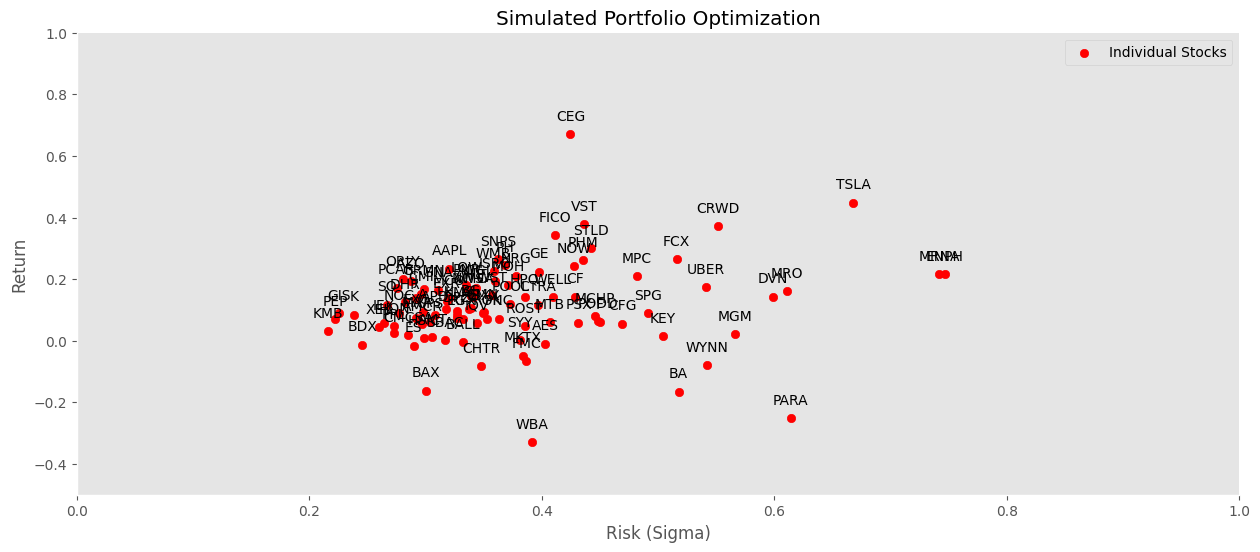

In [25]:
fig, ax = chart() # pre-defined chart

# Individual stocks
ax.scatter(metrics['volatility'], metrics['mean_returns'], color='red', label='Individual Stocks')

for i, ticker in enumerate(metrics.index):
    ax.annotate(
        ticker,
        (metrics['volatility'].iloc[i], metrics['mean_returns'].iloc[i]),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center'
    )

# Update the legend
ax.legend()

# Redraw the figure to update the display
plt.show()

### cov matrix review

In [26]:
cov_matrix

,CI,PEP,PSX,CMCSA,CEG,WYNN,PNC,STLD,SO,MKTX,...,KMI,BAX,ROST,ORLY,MTB,GRMN,APD,WELL,A,DPZ
CI,0.113892,0.035434,0.061126,0.037815,0.017528,0.066459,0.057604,0.062759,0.038621,0.029395,...,0.051054,0.034938,0.056774,0.041051,0.059263,0.037657,0.044529,0.057000,0.038098,0.016356
PEP,0.035434,0.049455,0.025221,0.032008,0.005731,0.028972,0.033859,0.028692,0.038838,0.029247,...,0.025221,0.028754,0.031326,0.035372,0.031146,0.029286,0.034474,0.036310,0.028444,0.019537
PSX,0.061126,0.025221,0.186260,0.045877,0.026105,0.117480,0.091583,0.099860,0.037520,0.018884,...,0.098495,0.028442,0.070750,0.036904,0.098076,0.043238,0.045878,0.086446,0.037518,0.010818
CMCSA,0.037815,0.032008,0.045877,0.081193,0.008525,0.062136,0.052785,0.048677,0.033008,0.029022,...,0.037542,0.034027,0.047243,0.034104,0.050672,0.036985,0.035969,0.052256,0.035522,0.021652
CEG,0.017528,0.005731,0.026105,0.008525,0.180310,0.028264,0.024540,0.043623,0.020138,0.012740,...,0.028818,0.008588,0.030404,0.017748,0.018958,0.022713,0.027971,0.019707,0.030771,0.021858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMN,0.037657,0.029286,0.043238,0.036985,0.022713,0.062623,0.054415,0.054017,0.034211,0.041368,...,0.038694,0.028538,0.050319,0.034219,0.053775,0.089072,0.041771,0.048297,0.047712,0.020602
APD,0.044529,0.034474,0.045878,0.035969,0.027971,0.062640,0.055446,0.059154,0.043356,0.035328,...,0.042371,0.035080,0.044694,0.032418,0.052910,0.041771,0.095065,0.051770,0.046012,0.019651
WELL,0.057000,0.036310,0.086446,0.052256,0.019707,0.113747,0.083508,0.083297,0.051599,0.034632,...,0.078324,0.031724,0.081650,0.043833,0.085483,0.048297,0.051770,0.167720,0.040666,0.022154
A,0.038098,0.028444,0.037518,0.035522,0.030771,0.059032,0.051841,0.050500,0.033189,0.044429,...,0.036198,0.040619,0.044334,0.032879,0.048484,0.047712,0.046012,0.040666,0.088731,0.026645


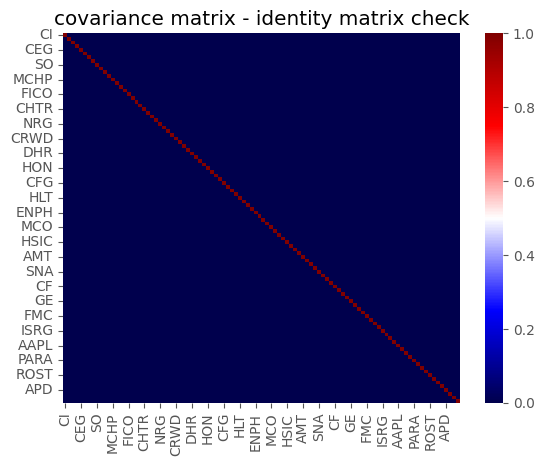

In [27]:
# checking the matrix inverse
inv_matrix = np.linalg.inv(cov_matrix)
np.set_printoptions(suppress=True, precision=6)
identity_matrix = pd.DataFrame(np.dot(cov_matrix, inv_matrix), index=cov_matrix.index, columns=cov_matrix.index).round(0)
sns.heatmap(identity_matrix, annot=False, fmt='0.27', cmap='seismic')
plt.title('covariance matrix - identity matrix check')
plt.show()

### Genetic Algorithm

In [55]:
fairies = run_generations(
    metrics,
    cov_matrix,
    num_generations=1000,
    num_stocks_per_portfolio = 25,
    fairy_num = 7,
    wanderer_num = 3
    )

In [48]:
fairies.head()

,elements,weights,mean_returns,volatility,cov_matrix,generation_id,portfolio_return,portfolio_variance,portfolio_volatility,portfolio_sharpe
0,"[KMI, BALL, SNPS, WST, IQV, DHR, WMB, MCHP, HP...","[0.12909809138893136, 0.008500422259540915, 0....","[0.09749186639491508, -0.004923332144989076, 0...","[0.3274875559521512, 0.3323899761275714, 0.362...",KMI BALL SNPS WST ...,0,0.123080,0.046269,0.215102,0.339747
1,"[SPG, AZO, ISRG, DVN, CI, K, ACGL, UBER, BDX, ...","[0.03855347199211035, 0.03887157918466066, 0.0...","[0.0885819084769646, 0.1922894724669974, 0.192...","[0.49156282665640977, 0.2873575198531239, 0.35...",SPG AZO ISRG DVN ...,0,0.053370,0.052640,0.229434,0.014689
2,"[WST, ENPH, CI, PODD, ROK, ROST, AES, UPS, BA,...","[0.046293350850988464, 0.026255462355455724, 0...","[0.14907073842568236, 0.2156031286487294, 0.10...","[0.35694737473094396, 0.7465016635238807, 0.33...",WST ENPH CI PODD ...,0,0.098586,0.059831,0.244603,0.198630
3,"[KMB, PARA, TSLA, LH, DHR, IDXX, WYNN, NOC, K,...","[0.029886919965029575, 0.013513435080743298, 0...","[0.031335672666859486, -0.2505698310734518, 0....","[0.21606559393293134, 0.6142676530367914, 0.66...",KMB PARA TSLA LH ...,0,0.100161,0.061960,0.248918,0.201516
4,"[HPQ, PARA, BDX, HON, FMC, PNC, VST, HSIC, PEP...","[0.002908825718995326, 0.06185268060424161, 0....","[0.14307958167681836, -0.2505698310734518, -0....","[0.3851739642848186, 0.6142676530367914, 0.245...",HPQ PARA BDX HON ...,0,0.117101,0.061258,0.247503,0.271112


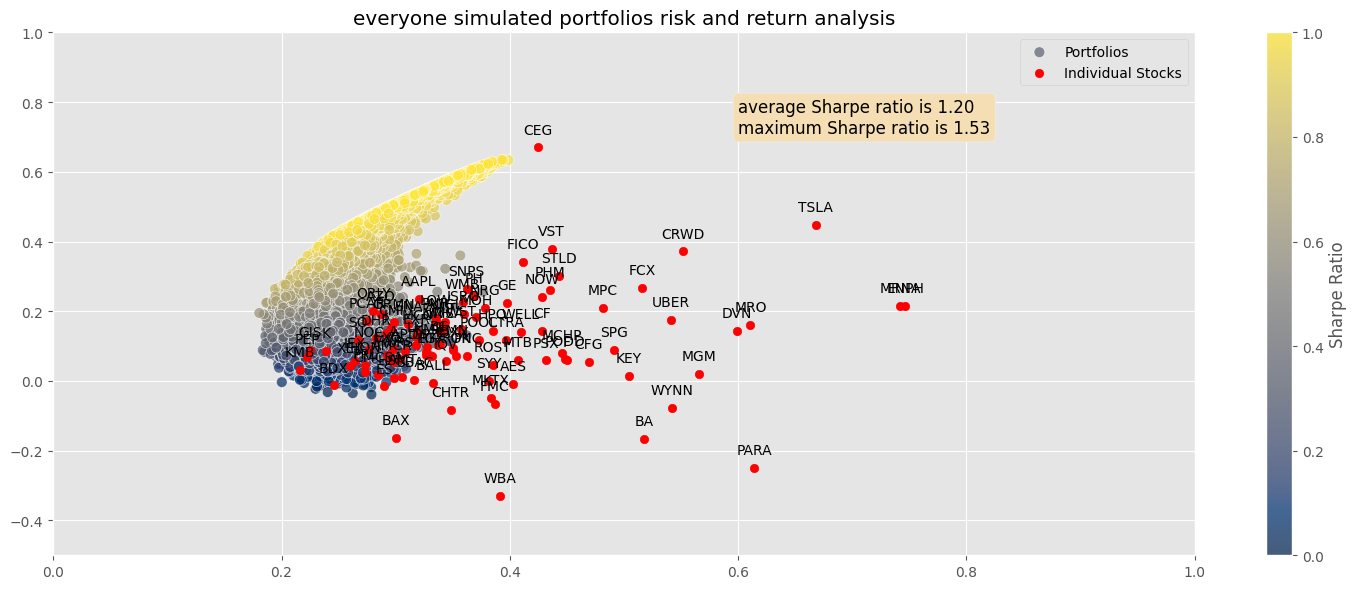

In [60]:
plot_generation_portfolios(fairies, metrics, generation_name= 'everyone')

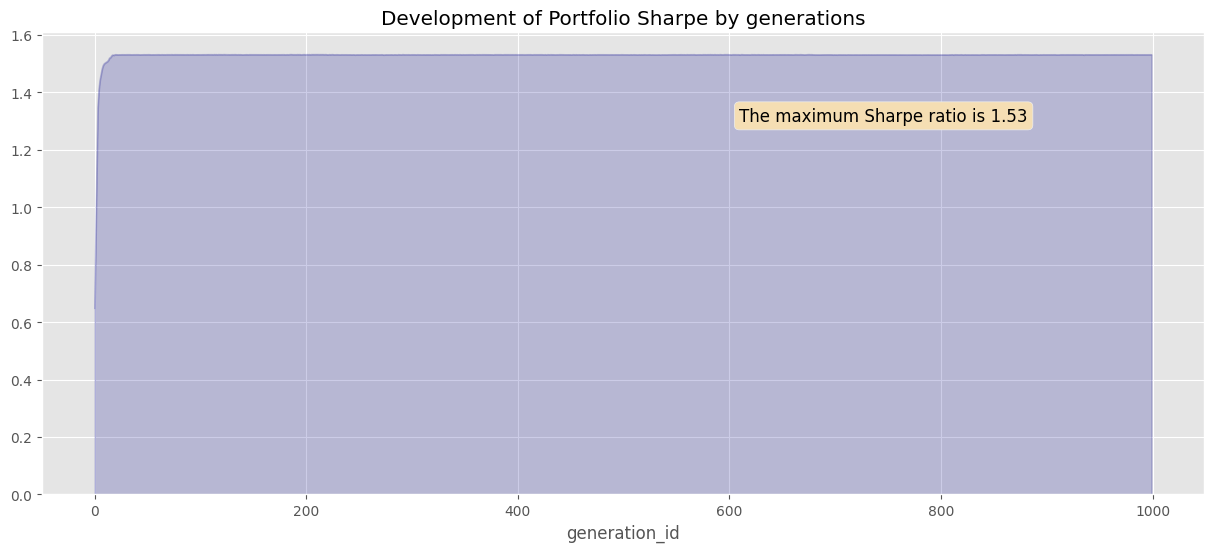

In [59]:
fairy_generations_max = fairies.groupby('generation_id')['portfolio_sharpe'].max()
fairy_generations_mean = fairies.groupby('generation_id')['portfolio_sharpe'].mean()
fairy_generations_min = fairies.groupby('generation_id')['portfolio_sharpe'].min()
max_achieved_sharpe = fairies['portfolio_sharpe'].max()


fig, ax = plt.subplots(figsize=(15, 6))
fairy_generations_max.plot(kind='area', color='darkblue', alpha=0.2, linewidth=1)
#fairy_generations_mean.plot(kind='bar', color='gray', linewidth=1)
#fairy_generations_min.plot(kind='bar', color='red', linewidth=1)
textstr = f"The maximum Sharpe ratio is {max_achieved_sharpe:.2f}"
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax.text(0.6, 0.8, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='bottom', bbox=props)

plt.title('Development of Portfolio Sharpe by generations')

plt.show()

In [61]:
max_sharpe_index = fairies['portfolio_sharpe'].idxmax() # Get the index of the maximum Sharpe ratioá
max_sharpe_data = fairies.loc[max_sharpe_index]
max_sharpe_weights = pd.DataFrame(max_sharpe_data['weights'], index=max_sharpe_data['elements'], columns=['weights'])
max_sharpe_weights = max_sharpe_weights.groupby(max_sharpe_weights.index).sum()
max_sharpe_weights

,weights
CEG,0.613303
FICO,0.105677
GIS,0.076987
ORLY,0.126739
STLD,0.022130
TSLA,0.055164


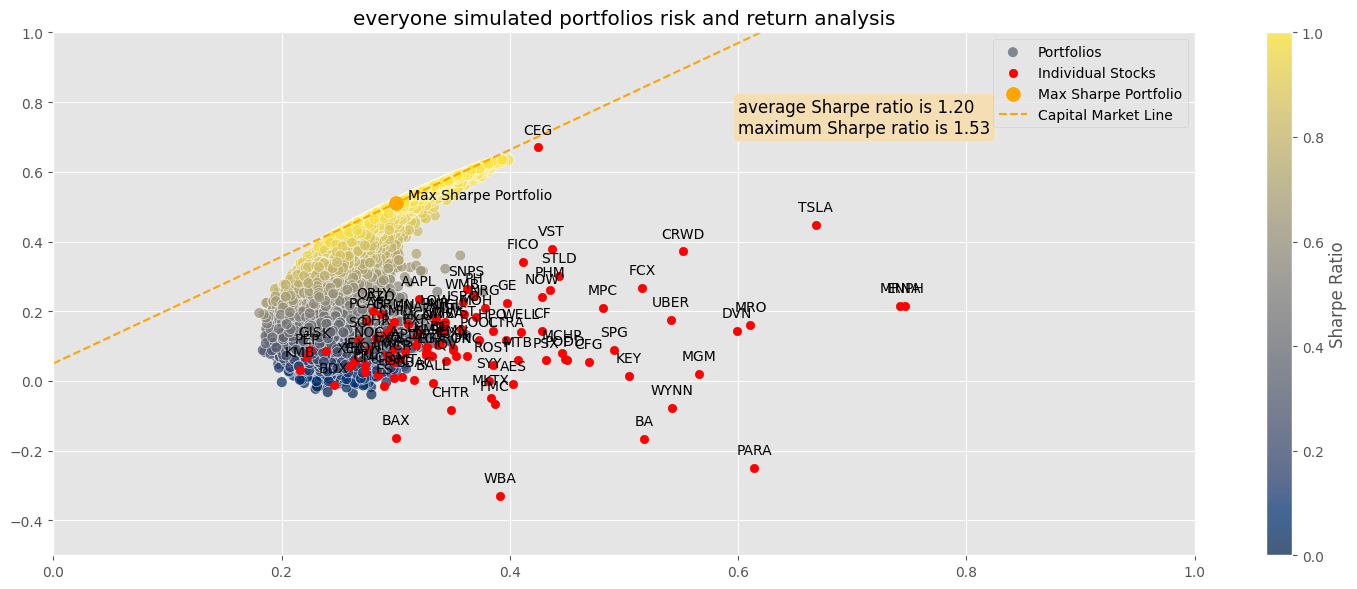

In [62]:
plot_generation_portfolios(fairies, metrics, generation_name= 'everyone')

plt.scatter(
    x=max_sharpe_data.loc['portfolio_volatility'],
    y=max_sharpe_data.loc['portfolio_return'],
    s=100,
    color='orange',
    label='Max Sharpe Portfolio'
)

plt.annotate('Max Sharpe Portfolio',
             xy=(max_sharpe_data.loc['portfolio_volatility'], max_sharpe_data.loc['portfolio_return']),
             xytext=(max_sharpe_data.loc['portfolio_volatility'] + 0.01, max_sharpe_data.loc['portfolio_return'] + 0.01),
             fontsize=10, color='black')

# Calculate the market portfolio's return and volatility
market_return = max_sharpe_data['portfolio_return']  # Extract the scalar value
market_volatility = max_sharpe_data['portfolio_volatility']  # Extract the scalar value
risk_free_rate = 0.05

# Add the Capital Market Line (CML)
cml_x = np.linspace(0, metrics['volatility'].max() * 1.2, 100)  # Adjusted for the full range
sharpe_slope = (market_return - risk_free_rate) / market_volatility  # Slope of the CML
cml_y = risk_free_rate + sharpe_slope * cml_x  # Calculate CML y-values

# Plot the CML using ax.plot() to avoid duplicates
plt.plot(cml_x, cml_y, color='orange', linestyle='--', label='Capital Market Line')

plt.legend()
plt.show()

In [57]:
def calculate_betas(max_sharpe_weights, metrics, cov_matrix):
    """
    Calculate beta values for all stocks in the metrics DataFrame relative to the maximum Sharpe portfolio.

    Parameters:
    - max_sharpe_weights: DataFrame with weights for the stocks in the maximum Sharpe portfolio.
    - metrics: DataFrame containing returns and volatility data for all stocks.
    - cov_matrix: Full covariance matrix of all stocks.

    Returns:
    - A DataFrame with the original metrics and an added column for beta values for each stock.
    """
    # Extract portfolio stocks and weights from max_sharpe_weights
    portfolio_stocks = max_sharpe_weights.index
    portfolio_weights = max_sharpe_weights['weights']

    # Calculate the market portfolio variance using the maximum Sharpe portfolio weights
    filtered_cov_matrix = cov_matrix.loc[portfolio_stocks, portfolio_stocks]
    market_var = portfolio_weights.T @ filtered_cov_matrix.to_numpy() @ portfolio_weights

    # Initialize a Series to store beta values for all stocks
    beta_values = pd.Series(index=metrics.index, dtype=float)

    # Calculate beta for each stock in the entire metrics DataFrame
    for ticker in metrics.index:
        # Covariance of the stock with the market portfolio
        stock_cov_with_market = cov_matrix.loc[ticker, portfolio_stocks].to_numpy() @ portfolio_weights
        beta_values[ticker] = stock_cov_with_market / market_var

    # Add the beta column to the metrics DataFrame
    metrics['Beta'] = beta_values
    return metrics



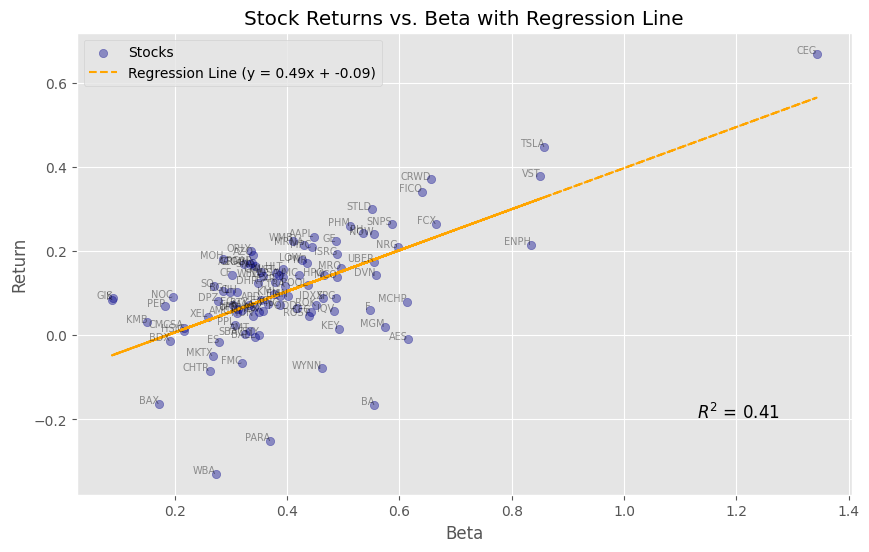

In [64]:
beta_df = calculate_betas(max_sharpe_weights, metrics, cov_matrix)


# Extract Beta and Return values for regression
x = beta_df['Beta']
y = beta_df['mean_returns']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the regression line
regression_line = slope * x + intercept


# Plot the scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='darkblue', alpha=0.4, label='Stocks')
plt.plot(x, regression_line, color='orange', linestyle='--', label=f'Regression Line (y = {slope:.2f}x + {intercept:.2f})')


# Add labels for each stock
for ticker in beta_df.index:
    plt.text(beta_df.loc[ticker, 'Beta'], beta_df.loc[ticker, 'mean_returns'], ticker, fontsize=7, alpha=0.4, ha='right')

# Display R-squared value on the plot
plt.text(0.8, 0.2, f'$R^2$ = {r_value**2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Set plot labels and title
plt.xlabel('Beta')
plt.ylabel('Return')
plt.title('Stock Returns vs. Beta with Regression Line')
plt.grid(True)
plt.legend()
plt.show()